# Testing TD-Learning

In [1]:
import numpy as np
import itertools
import random
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

sys.path.append( os.path.join('..') )
from RLearning.envrioments import SimplifiedBlackjack
from RLearning.temporal_difference import NStepSarsa, SARSA
from RLearning.interfaces import TabularInterface

from RLearning.envrioments import RandomDiscreteWalk

from sklearn.metrics import mean_squared_error

## N-Step TD

In [8]:
envrioment = RandomDiscreteWalk()
true_state_values = [ i/6 for i in range(1, 6+1) ]
true_state_values[-1] = 0 # Terminal state
true_state_values

[0.16666666666666666,
 0.3333333333333333,
 0.5,
 0.6666666666666666,
 0.8333333333333334,
 0]

In [27]:
%%time
alpha_values = np.linspace(0.1, 1, 20) 
interfaces = [ TabularInterface( alpha=alpha, alpha_decay="constant" )
               for alpha in alpha_values
             ]
mean_rmse_erros = []

for interface in interfaces:

  mse_errors = []
  for repetition in range(100):
    agent = NStepSarsa( env_interface=interface, episodes=1, n_steps=10 )
    mse_episode_errors = []
    for episode in range(10):
      agent.fit(envrioment)
      mse_error = mean_squared_error(true_state_values, agent.env_interface.state_value)
      mse_episode_errors.append( mse_error )
      
    mse_errors.append( np.mean(mse_episode_errors) )

  mean_rmse_erros.append( np.sqrt( np.mean(mse_errors) ) )

CPU times: total: 10.8 s
Wall time: 11 s


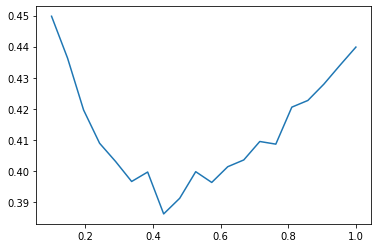

In [28]:
plt.plot( alpha_values, mean_rmse_erros )